## <center> Data Detectives: Solving Transction Fraud Crimes with Supervised Learning!</center>

### Problem definition
- A payment transaction dataset is provided. The task is to create an supervised machine learning to predict wether the transic were fraud.

### Requirements 

1. Data Exploration
2. Prepare the dataset for machine learning
3. Create an unsupervised machine learning model 
4. Measure the accurancy of the model

### Deliverables 

1. Code on Github
2. Presentation


### Methodology

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to get insights
4. Prepare the data to better expose the underlying data partterns to Machine Learning algorithms.
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and short-list the best ones
7. Present your solution
8. Launch monitor, and maintain your system.

#### Frame the problem and look at the big picture

1. Define the objective in business terms.

Explore the data and create a supervised machine learning model to predict fraud on payments.
Maybe I will also look at some examples available online.

2. How will your solution be used?

This is just an exercise, but if I have time I can try to deploy it to streamlit.

3. What are the current solutions/workarounds (if any)?

To be honest, I need to read more about supervised machine learning prior creating the model, to choose the best one.

4. How should you frame this problem (supervised/unsupervised, online/offline,
etc.)?

This will be a supervised machine learning project as this is for a bootcamp assigment.

5. How should performance be measured?
Maybe confusion matrix, AROC curve. 

6. Is the performance measure aligned with the business objective?

7. What would be the minimum performance needed to reach the business objec‐
tive?
I think if I achive 80% I am happy.

8. What are comparable problems? Can you reuse experience or tools?
The heart failure mortality prediction is similar I think.

9. Is human expertise available?
No. Probably youtube, stack overflow will be my best friends.

10. How would you solve the problem manually?


11. List the assumptions you (or others) have made so far.

12. Verify assumptions if possible.

#### Get the Data

1. List the data you need and how much you need. Data from Kaggle, we will look at all data for now.

step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction

2. Find and document where you can get that data. Data available on Kaggle.

3. Check how much space it will take. No need to worry about this.

4. Check legal obligations, and get authorization if necessary. No need to worry about this, public available.

5. Get access authorizations. No need to worry about this, public available.

6. Create a workspace (with enough storage space).

7. Get the data.

8. Convert the data to a format you can easily manipulate (without changing the
data itself).

9. Ensure sensitive information is deleted or protected (e.g., anonymized). No need to worry about this, public available.

10. Check the size and type of data (time series, sample, geographical, etc.).

11. Sample a test set, put it aside, and never look at it (no data snooping!).

##### Import all libraries 

Note that I will add libraries as long as I go

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
from sklearn.model_selection import train_test_split
import plotly.offline as py
import plotly.figure_factory as ff
from IPython.display import HTML, display
from IPython.core import display as ICD
from plotly.offline import init_notebook_mode, iplot
import matplotlib as mpl
from sklearn.cluster import KMeans
from statsmodels import robust
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import shapiro
from scipy.stats.mstats import winsorize
from sklearn.model_selection import ShuffleSplit
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

7. Get the data.

In [2]:
#Import red wine data
fraud_detection_data = pd.read_csv('fraude_detection.csv')

6. Create a workspace (with enough storage space).

I have created manually as per a youtube video. I still did not manage how to do this well.

8. Convert the data to a format you can easily manipulate (without changing the data itself).

Need to go back to tis, as I find difficult to understand how to do this.

10. Check the size and type of data.

In [3]:
fraud_detection_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
fraud_detection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
fraud_detection_data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [6]:
# Set display options so it doesnt show exponencial numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Describe the dataframe
fraud_detection_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1100701.67,1224996.40,0.00,0.00
std,142.33,603858.23,2888242.67,2924048.50,3399180.11,3674128.94,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.94,14208.00,0.00,132705.66,214661.44,0.00,0.00
75%,335.00,208721.48,107315.18,144258.41,943036.71,1111909.25,0.00,0.00
max,743.00,92445516.64,59585040.37,49585040.37,356015889.35,356179278.92,1.00,1.00


Clean the data and check for nul values

In [7]:
fraud_detection_data.isnull().sum()

# no missing values for fraud detection, its a miracle in data science! ah ah ah

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
fraud_detection_data['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [9]:
# Count the number of categories in the 'fruit' column
num_categories = fraud_detection_data['nameOrig'].nunique()

# Print the result
print("Number of categories:", num_categories)

Number of categories: 6353307


In [10]:
# Count the number of categories in the 'fruit' column
num_categories = fraud_detection_data['nameDest'].nunique()

# Print the result
print("Number of categories:", num_categories)

Number of categories: 2722362


array([[<AxesSubplot: title={'center': 'step'}>,
        <AxesSubplot: title={'center': 'amount'}>,
        <AxesSubplot: title={'center': 'oldbalanceOrg'}>],
       [<AxesSubplot: title={'center': 'newbalanceOrig'}>,
        <AxesSubplot: title={'center': 'oldbalanceDest'}>,
        <AxesSubplot: title={'center': 'newbalanceDest'}>],
       [<AxesSubplot: title={'center': 'isFraud'}>,
        <AxesSubplot: title={'center': 'isFlaggedFraud'}>,
        <AxesSubplot: >]], dtype=object)

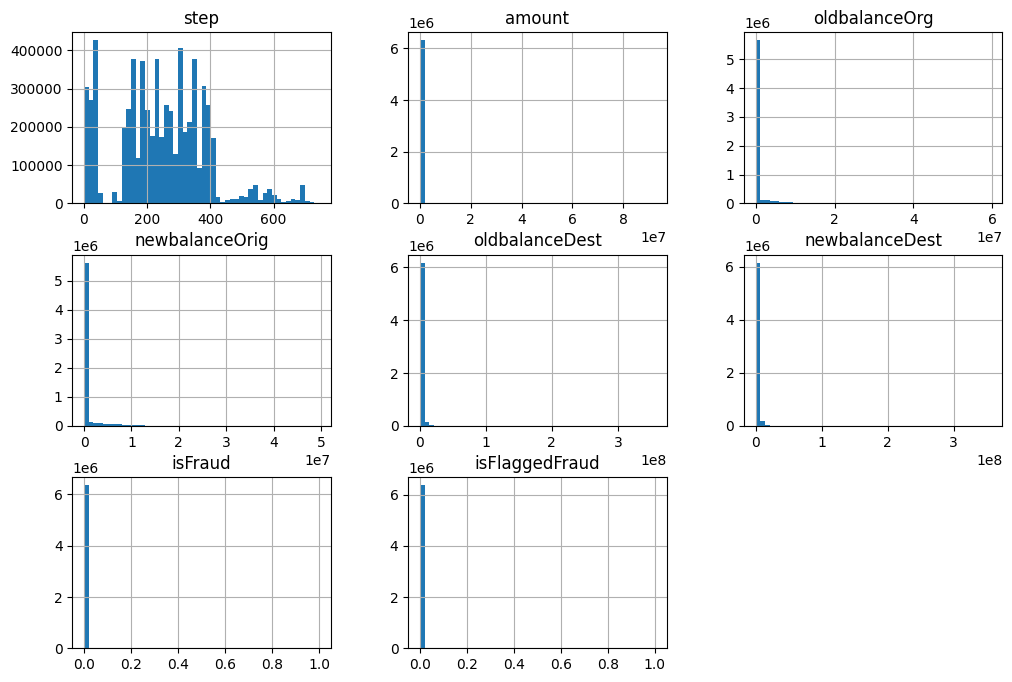

In [11]:
fraud_detection_data.hist(bins=50, figsize=(12,8))



11. Sample a test set, put it aside, and never look at it (no data snooping!).


In [12]:
#def shuffle_and_split_data(data, test_ratio):
   # shuffled_indices = np.random.permutation(len(data))
   # test_set_size = int(len(data) * test_ratio)
   # test_indices = shuffled_indices[:test_set_size]
   # train_indices = shuffled_indices[test_set_size:]
   # return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
# second step is to use the following fuction to slit data into 30 % for test
#train_set, test_set = shuffle_and_split_data(fraud_detection_data, 0.3)



To ensure that this notebook's outputs remain the same every time we run it, we need to set the random seed:

In [14]:
# if you run the program again, it will generate a different dataset, overtime ML get used to the hole dataset, which is what you want to avoid.
#to avoid this, you can save the test set on the first run and then load in runs.
#Another option is set the random number generator seed - generating the same number of shuffled indices
#np.random.seed(42)

In [15]:
#other way of diving the test and train
#train_set, test_set = train_test_split(fraud_detection_data, test_size=0.2, random_state=42)

In [16]:
#check the lengh of the test set
#len(test_set)

In [17]:
#check the len of training dataset
#len(train_set)

5. Visualize the data.

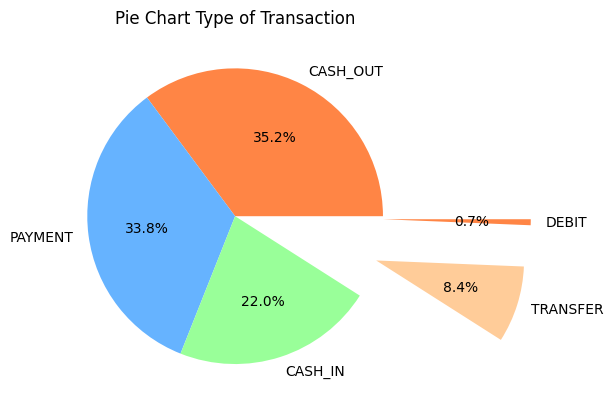

In [18]:
# Create a pandas series containing the data
data = fraud_detection_data['type'].value_counts() # data is a pandas series containing the counts of each type of network transmiting earthquake

# Create the pie chart
colors = ["#ff8545","#66b3ff","#99ff99","#ffcc99"]
#autopct parameter is used to format the values of the chart, in this case it is showing the percentage with one decimal point.
explode = [ 1 if i < 0.1 else 0 for i in data/data.sum()]
plt.pie(data, labels=data.index, autopct='%1.1f%%',colors=colors,explode = explode) #labels parameter is used to provide the categories of the data, in this case the different types of networks

plt.title('Pie Chart Type of Transaction', loc="center")
plt.show()

In [19]:
fraud_detection_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)

To be honest, I am still not sure how best to look dof noiseness in the data,I think probably I have to read more about it

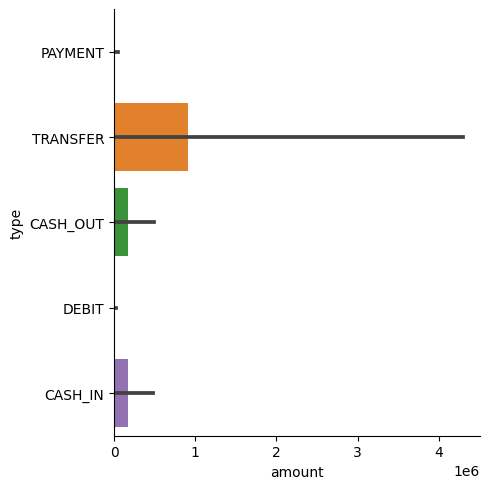

In [20]:
# Create catplot
sns.catplot(data=fraud_detection_data, x="amount", y="type", errorbar=("pi", 95), kind="bar")

# Display the plot
plt.show()

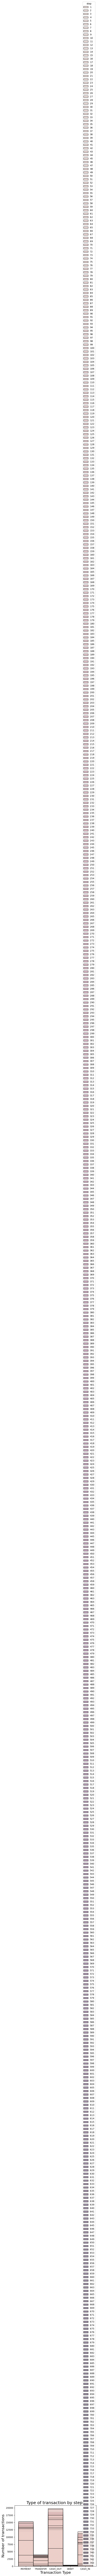

In [21]:

sns.histplot(fraud_detection_data, x="type", hue="step") #hue is used to draw multiple histograms from a long-form dataset with hue mapping:

plt.title('Type of transaction by steps', fontsize=18)
plt.xlabel('Transaction Type', fontsize=16)
plt.ylabel('Number of transactions', fontsize=16)
plt.show()

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:39: UserWarning:

FixedFormatter should only be used together with FixedLocator



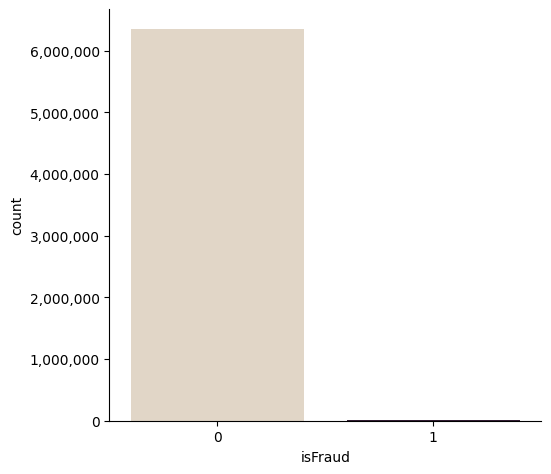

In [22]:
# Create the countplot
countplot = sns.catplot(data=fraud_detection_data, x="isFraud", kind="count", palette="ch:.25")

# Change the y-axis tick label format to not display scientific notation
countplot.set(yticklabels=['{:,.0f}'.format(y) for y in countplot.ax.get_yticks()])

# Display the plot
plt.show()

4. For supervised learning tasks, identify the target attribute(s).

In [23]:
#Correlation values with quality for the red data
corr_matrix_red = fraud_detection_data.corr()
corr_matrix_red["isFraud"].sort_values(ascending=False)

C:\Users\jlapa\AppData\Local\Temp\ipykernel_37656\273087795.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



isFraud           1.00
amount            0.08
isFlaggedFraud    0.04
step              0.03
oldbalanceOrg     0.01
newbalanceDest    0.00
oldbalanceDest   -0.01
newbalanceOrig   -0.01
Name: isFraud, dtype: float64

The best variable to predict fraud may vary depending on the specific dataset and problem. However, some common features that may be useful in predicting fraud include:

Transaction amount: Large transactions may be more likely to be fraudulent.

Transaction type: Certain transaction types may be more commonly associated with fraud.

Time of day/day of week: Fraudulent transactions may be more likely to occur at certain times.

Location: Transactions from certain geographic regions may be more likely to be fraudulent.

User behavior: Unusual or suspicious behavior from a user may indicate fraud.

Ultimately, the best variable to predict fraud will depend on the specific dataset and the factors that are most predictive of fraudulent behavior within that dataset. A careful feature engineering process and model selection process can help identify the most important variables for predicting fraud.

7. Study how you would solve the problem manually.

8. Identify the promising transformations you may want to apply.

9. Identify extra data that would be useful

10. Document what you have learned.

### Prepare the Data

Notes:

• Work on copies of the data (keep the original dataset intact).

• Write functions for all data transformations you apply, for five reasons:

— So you can easily prepare the data the next time you get a fresh dataset

— So you can apply these transformations in future projects

— To clean and prepare the test set

— To clean and prepare new data instances once your solution is live

— To make it easy to treat your preparation choices as hyperparameters

1. Data cleaning:

• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).

In [24]:
# I choose to do a Shapiro-wilk test to evaluate if the sample data comes from normal distribution

# Extract the columns we want to test
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
data = fraud_detection_data[cols]

# Loop through each column and perform the Shapiro-Wilk test
for col in cols: # create a loop 
    stat, p = shapiro(data[col]) #stats refers tothe testa statistic whic is shapiro
    print(f'{col}:') 
    print('Shapiro-Wilk test statistic:', stat)
    print('p-value:', p)
    if p > 0.05:
        print('The data is likely normally distributed')
    else:
        print('The data is likely not normally distributed')

## although the data seems normally distributed, none of the data variables it is 

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning:

p-value may not be accurate for N > 5000.



amount:
Shapiro-Wilk test statistic: 0.1925777792930603
p-value: 0.0
The data is likely not normally distributed
oldbalanceOrg:
Shapiro-Wilk test statistic: 0.3232288360595703
p-value: 0.0
The data is likely not normally distributed
newbalanceOrig:
Shapiro-Wilk test statistic: 0.3306577801704407
p-value: 0.0
The data is likely not normally distributed
oldbalanceDest:
Shapiro-Wilk test statistic: 0.29884427785873413
p-value: 0.0
The data is likely not normally distributed
newbalanceDest:
Shapiro-Wilk test statistic: 0.3022106885910034
p-value: 0.0
The data is likely not normally distributed


In [25]:
#drop collumns 
fraud_detection_data.drop("oldbalanceDest", axis=1, inplace=True) #axis =1 means droppig column


In [26]:
fraud_detection_data.drop("oldbalanceOrg", axis=1, inplace=True)

In [27]:
#fraud_detection_data.drop("newbalanceOrig", axis=1, inplace=True)

In [28]:
fraud_detection_data.drop("newbalanceDest", axis=1, inplace=True)	

In [29]:
fraud_detection_data

,step,type,amount,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,0.00,C776919290,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,0.00,C1881841831,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,0.00,C1365125890,1,0
6362618,743,TRANSFER,850002.52,C1685995037,0.00,C2080388513,1,0


Handling text and categorical variables

In [30]:
#Convert categories into numbers
#Basically the fit method, prepare the encoder (fit on your data i.e. prepare the mapping) but don't transform the data.

#You have to call transform to transform the data , or use fit_transform which fit and transform the same data.

enc = OrdinalEncoder()
fraud_detection_data[["type","nameOrig","nameDest"]] = enc.fit_transform(fraud_detection_data[["type","nameOrig","nameDest"]])


In [31]:
fraud_detection_data

,step,type,amount,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
0,1,3.00,9839.64,757869.00,160296.36,1662094.00,0,0
1,1,3.00,1864.28,2188998.00,19384.72,1733924.00,0,0
2,1,4.00,181.00,1002156.00,0.00,439685.00,1,0
3,1,1.00,181.00,5828262.00,0.00,391696.00,1,0
4,1,3.00,11668.14,3445981.00,29885.86,828919.00,0,0
...,...,...,...,...,...,...,...,...
6362615,743,1.00,339682.13,5651847.00,0.00,505863.00,1,0
6362616,743,4.00,6311409.28,1737278.00,0.00,260949.00,1,0
6362617,743,1.00,6311409.28,533958.00,0.00,108224.00,1,0
6362618,743,4.00,850002.52,2252932.00,0.00,319713.00,1,0


Custom transformers

No much time for this, but somethings to look at next exercise

Feature Scaling

I choose MinMaxScaler: values are shifted and rescaled so they end up ranging from 0 to 1

In [32]:
#calculate MAD for all columns
fraud_detection_data[['amount','nameOrig', 'nameDest']].apply(robust.mad)

amount      101400.58
nameOrig   2354903.84
nameDest    405734.85
dtype: float64

In [33]:
# Initialize a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
cols_to_normalize = ['amount','nameOrig','nameDest','newbalanceOrig']


# Apply the scaler to the selected columns
fraud_detection_data[cols_to_normalize] = scaler.fit_transform(fraud_detection_data[cols_to_normalize])

In [34]:
#calculate MAD for all columns
fraud_detection_data[['amount','nameOrig','nameDest','newbalanceOrig']].apply(robust.mad)

amount           0.00
nameOrig         0.37
nameDest         0.15
newbalanceOrig   0.00
dtype: float64

In [35]:
fraud_detection_data

,step,type,amount,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
0,1,3.00,0.00,0.12,0.00,0.61,0,0
1,1,3.00,0.00,0.34,0.00,0.64,0,0
2,1,4.00,0.00,0.16,0.00,0.16,1,0
3,1,1.00,0.00,0.92,0.00,0.14,1,0
4,1,3.00,0.00,0.54,0.00,0.30,0,0
...,...,...,...,...,...,...,...,...
6362615,743,1.00,0.00,0.89,0.00,0.19,1,0
6362616,743,4.00,0.07,0.27,0.00,0.10,1,0
6362617,743,1.00,0.07,0.08,0.00,0.04,1,0
6362618,743,4.00,0.01,0.35,0.00,0.12,1,0


Transform Pipelines

not sure what else needs doing,

In [36]:
# Converting strings into numbers


Select and train model

## Logistical regression

In [37]:
fraud_detection_data.head(100)

,step,type,amount,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
0,1,3.00,0.00,0.12,0.00,0.61,0,0
1,1,3.00,0.00,0.34,0.00,0.64,0,0
2,1,4.00,0.00,0.16,0.00,0.16,1,0
3,1,1.00,0.00,0.92,0.00,0.14,1,0
4,1,3.00,0.00,0.54,0.00,0.30,0,0
...,...,...,...,...,...,...,...,...
95,1,4.00,0.01,0.92,0.00,0.04,0,0
96,1,4.00,0.01,0.92,0.00,0.06,0,0
97,1,4.00,0.00,0.80,0.00,0.02,0,0
98,1,3.00,0.00,0.21,0.00,0.48,0,0


In [38]:
fraud_detection_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            float64
 2   amount          float64
 3   nameOrig        float64
 4   newbalanceOrig  float64
 5   nameDest        float64
 6   isFraud         int64  
 7   isFlaggedFraud  int64  
dtypes: float64(5), int64(3)
memory usage: 388.3 MB


In [39]:
# Specify the X and y variables
X = fraud_detection_data[['step','type','amount','nameOrig','nameDest']]
y = fraud_detection_data['isFraud']

In [40]:
#Train, test and split my data, test size is 30%, 70% is for training
X_train, X_test, Y_train, Y_test = train_test_split (X,y, test_size=0.3, random_state=32)

In [41]:
LogisticRegression_model = LogisticRegression(random_state=0) # Logistic regression model
LogisticRegression_model.fit(X_train,Y_train) ##train the model

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [42]:
prediction = LogisticRegression_model.predict(X_test) #predict the response
print(prediction)

[0 0 0 ... 0 0 0]


In [43]:
result = {'isFraud':Y_test, 'pred':prediction}
result_df = pd.DataFrame(result)
print(result_df)
result_df.head(50)

         isFraud  pred
4789946        0     0
2678785        0     0
5221322        0     0
19881          0     0
3473074        0     0
...          ...   ...
5313774        0     0
4393188        0     0
5929344        0     0
1401661        0     0
2668868        0     0

[1908786 rows x 2 columns]


,isFraud,pred
4789946,0,0
2678785,0,0
5221322,0,0
19881,0,0
3473074,0,0
894638,0,0
3168355,0,0
2438049,0,0
4178296,0,0
183536,0,0


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,prediction)
print(confusion_matrix)

[[1906376       0]
 [   2410       0]]


Ridge regression

In [45]:
model_ridge = Ridge(alpha=1, random_state= 32)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=1, random_state=32)

In [46]:
## make predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
4789946,0,0.00
2678785,0,0.00
5221322,0,0.00
19881,0,-0.00
3473074,0,-0.00
...,...,...
5313774,0,0.00
4393188,0,0.00
5929344,0,0.00
1401661,0,-0.00


In [47]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 0.002975966341878034
MSE: 0.0012519456022070353
RMSE: 0.03538284333129597
R2: 0.00717126911961663


Neural network

In [48]:
# displaying the datatypes
display(fraud_detection_data.dtypes)

step                int64
type              float64
amount            float64
nameOrig          float64
newbalanceOrig    float64
nameDest          float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [49]:
#Convert variables from float to interger- this will make all values 0, which is a mistake to use after converting your variables


# converting 'Weight' from float to int
#fraud_detection_data['type'] = fraud_detection_data['type'].astype(int)
#fraud_detection_data['amount'] = fraud_detection_data['amount'].astype(int)
#fraud_detection_data['nameOrig'] = fraud_detection_data['nameOrig'].astype(int)
#fraud_detection_data['nameDest'] = fraud_detection_data['nameDest'].astype(int)

# displaying the datatypes
#display(fraud_detection_data.dtypes)

In [50]:
fraud_detection_data

,step,type,amount,nameOrig,newbalanceOrig,nameDest,isFraud,isFlaggedFraud
0,1,3.00,0.00,0.12,0.00,0.61,0,0
1,1,3.00,0.00,0.34,0.00,0.64,0,0
2,1,4.00,0.00,0.16,0.00,0.16,1,0
3,1,1.00,0.00,0.92,0.00,0.14,1,0
4,1,3.00,0.00,0.54,0.00,0.30,0,0
...,...,...,...,...,...,...,...,...
6362615,743,1.00,0.00,0.89,0.00,0.19,1,0
6362616,743,4.00,0.07,0.27,0.00,0.10,1,0
6362617,743,1.00,0.07,0.08,0.00,0.04,1,0
6362618,743,4.00,0.01,0.35,0.00,0.12,1,0


In [51]:
# Specify the X and y variables
X = fraud_detection_data[['step','type','amount','nameOrig','nameDest']]
y = fraud_detection_data['isFraud']

In [52]:
model = Sequential()


In [53]:
##set up the layers
## input layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu', input_dim = 5))
## hidden layer
model.add(Dense(units= 50, kernel_initializer= 'uniform', activation = 'relu'))
##regularization
model.add(Dropout(0.2))
##output layer
model.add(Dense(units= 1, kernel_initializer= 'uniform', activation = 'sigmoid'))

## compiling the ANN
#opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile( loss ='binary_crossentropy', metrics = ['accuracy'], optimizer= 'adam') 

#optimizer can be changed, normally best is Adam, but you can try https://keras.io/api/optimizers/adam/

In [54]:
## train the model
history = model.fit(X_train , Y_train, batch_size = 32, epochs = 20, validation_split= 0.30)


Epoch 1/20


C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\engine\data_adapter.py:1696: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.



97428/97428 [==============================] - 92s 933us/step - loss: 0.0107 - accuracy: 0.9987 - val_loss: 0.0091 - val_accuracy: 0.9987
Epoch 2/20
97428/97428 [==============================] - 89s 914us/step - loss: 0.0094 - accuracy: 0.9987 - val_loss: 0.0097 - val_accuracy: 0.9987
Epoch 3/20
97428/97428 [==============================] - 89s 914us/step - loss: 0.0093 - accuracy: 0.9987 - val_loss: 0.0089 - val_accuracy: 0.9987
Epoch 4/20
97428/97428 [==============================] - 89s 918us/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0091 - val_accuracy: 0.9987
Epoch 5/20
97428/97428 [==============================] - 89s 912us/step - loss: 0.0092 - accuracy: 0.9987 - val_loss: 0.0088 - val_accuracy: 0.9987
Epoch 6/20
97428/97428 [==============================] - 89s 913us/step - loss: 0.0098 - accuracy: 0.9987 - val_loss: 0.0094 - val_accuracy: 0.9987
Epoch 7/20
97428/97428 [==============================] - 89s 915us/step - loss: 0.0099 - accuracy: 0.9987 - val_loss

In [55]:
# Plot train loss and validation loss
def plot_loss (history):
    fig, ax = plt.subplots(figsize = (15,6))
    ax.plot(history.history['loss'],color="#004C99")
    ax.plot(history.history['val_loss'],color="#D96552")
    #ax.set_facecolor("#D3D3D3")
    plt.grid(b=False,axis = 'y')
    ax.grid(b=False,axis = 'y')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right',prop={'size': 15})

C:\Users\jlapa\AppData\Local\Temp\ipykernel_37656\2983302842.py:7: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.

C:\Users\jlapa\AppData\Local\Temp\ipykernel_37656\2983302842.py:8: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



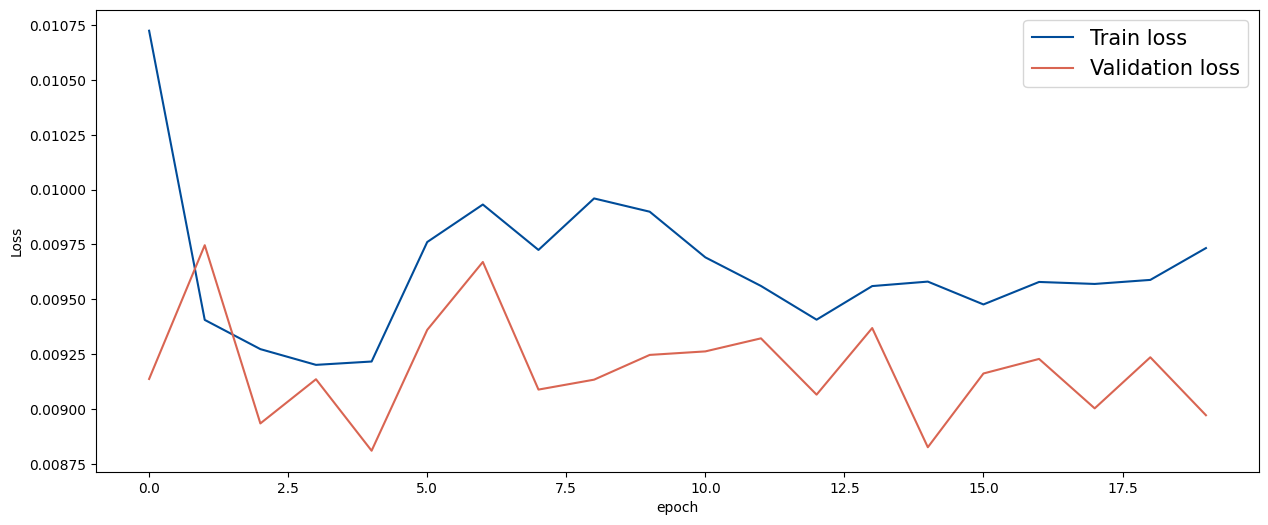

In [56]:
plot_loss (history)

In [57]:
## make prediction
y_pred_hf = model.predict(X_test)
y_pred_hf = np.where(y_pred_hf > 0.5, 1, 0) # on binary put between 0 and 1, othrwise it will predict a float number

59650/59650 [==============================] - 28s 470us/step


In [58]:
print(Y_test.shape)
print(y_pred_hf.shape)

(1908786,)
(1908786, 1)


In [59]:
y_pred_hf = y_pred_hf.flatten()

In [60]:
print(Y_test.shape)
print(y_pred_hf.shape)

(1908786,)
(1908786,)


In [61]:
pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred_hf})

,Actual,Predicted
4789946,0,0
2678785,0,0
5221322,0,0
19881,0,0
3473074,0,0
...,...,...
5313774,0,0
4393188,0,0
5929344,0,0
1401661,0,0


In [62]:
##classification report
print(classification_report(Y_test, y_pred_hf))

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906376
           1       0.00      0.00      0.00      2410

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786



C:\Users\jlapa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [63]:
cm = confusion_matrix[Y_test, y_pred_hf]
cm

array([1906376, 1906376, 1906376, ..., 1906376, 1906376, 1906376],
      dtype=int64)

In [73]:
## plot a confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5, 5), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize = 10)
plt.title('Confusion Matrix', fontsize = 10)
plt.show()

AxisError: axis 1 is out of bounds for array of dimension 1

In [68]:
auc = roc_auc_score(Y_test, y_pred_hf)
print('AUC: %f' %auc)

AUC: 0.500000


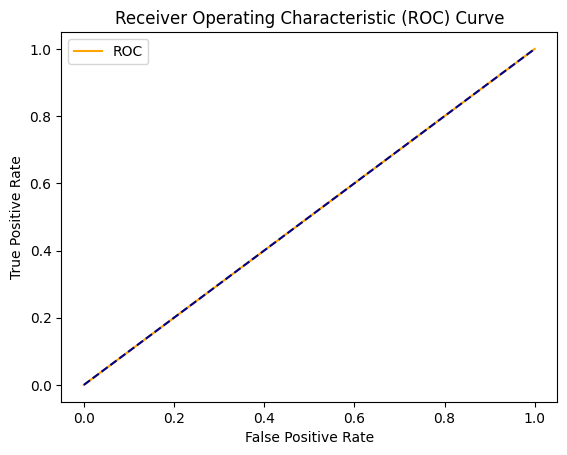

In [69]:
fpr, tpr = roc_curve(Y_test, y_pred_hf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()